R-squared: 0.9124015892836134


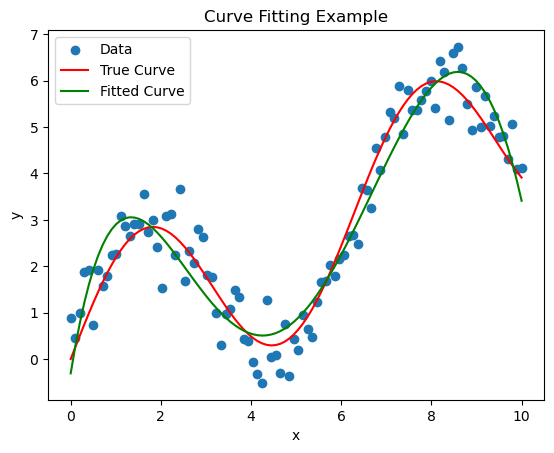

In [7]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_true = 2 * np.sin(x) + 0.5 * x
noise = np.random.normal(0, 0.5, x.shape)
y = y_true + noise

# Convert data to CuPy arrays
x_cp = cp.asarray(x)
y_cp = cp.asarray(y)

# Perform polynomial fitting using cupy.polyfit()
degree = 5
coeffs = cp.polyfit(x_cp, y_cp, degree)

# Generate predictions using the fitted polynomial
y_pred = cp.polyval(coeffs, x_cp)

# Compute the sum of squared residuals
ssr = cp.sum((y_cp - y_pred) ** 2)

# Compute the total sum of squares
sst = cp.sum((y_cp - cp.mean(y_cp)) ** 2)

# Compute the coefficient of determination (R-squared)
r_squared = 1 - ssr / sst

# Convert predictions to NumPy array
y_pred_np = cp.asnumpy(y_pred)

print(f"R-squared: {r_squared}")

# Plot the original data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x, y_true, 'r', label='True Curve')
plt.plot(x, y_pred_np, 'g', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting Example')
plt.show()
